# White Wine

In [19]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale


In [20]:
#read in dataset - white wine
white = pd.read_csv('/Users/jennamferguson/Downloads/white wine fr.csv').drop_duplicates()
colNames = ['fixed_acidity', 'volatile_acidity', 'citric_acid','residual_sugar','chlorides','free_sulfer_dioxide','total_sulfer_dioxide','density','pH','sulphates','alcohol','quality']
white.columns = colNames
white

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfer_dioxide,total_sulfer_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [21]:
#change quality into a binary variable, 7 and above is good, below is bad
white['target'] = white['quality'].apply(lambda x: 1 if x >= 7 else 0)
white['target'].value_counts()

0    3136
1     825
Name: target, dtype: int64

In [22]:
#create X and Y
X = white.drop(['quality', 'target'], axis = 1)
y = white['target']

#Scale
scales_wine = scale(X)


In [23]:
#Run K-Means
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=1)
X['cluster'] = kmeans.fit_predict(X)

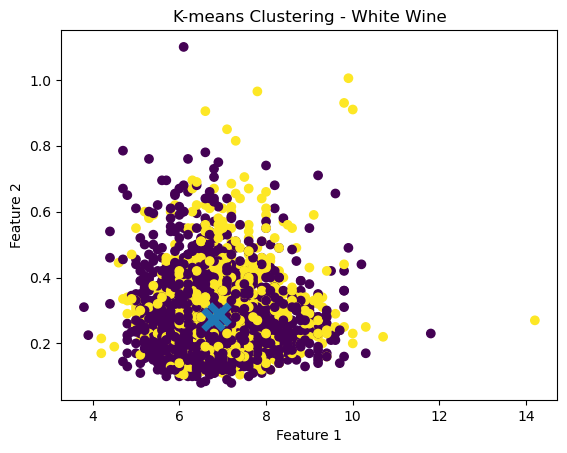

In [24]:
#plot kmeans clustering

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="x", s=200, linewidths=5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering - White Wine')
plt.show()

# Red Wine

In [25]:
#read in dataset - red wine
red = pd.read_csv('/Users/jennamferguson/Downloads/winequality-red.csv').drop_duplicates()
colNames = ['fixed_acidity', 'volatile_acidity', 'citric_acid','residual_sugar','chlorides','free_sulfer_dioxide','total_sulfer_dioxide','density','pH','sulphates','alcohol','quality']
red.columns = colNames
red[:10]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfer_dioxide,total_sulfer_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


In [26]:
red['target'] = red['quality'].apply(lambda x: 1 if x >= 7 else 0)
red['target'].value_counts()

0    1175
1     184
Name: target, dtype: int64

In [27]:
#create X and Y
X = red.drop(['quality', 'target'], axis = 1)
y = red['target']

#Scale
scales_wine = scale(X)


In [28]:
#Run KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=1)
X['cluster'] = kmeans.fit_predict(X)

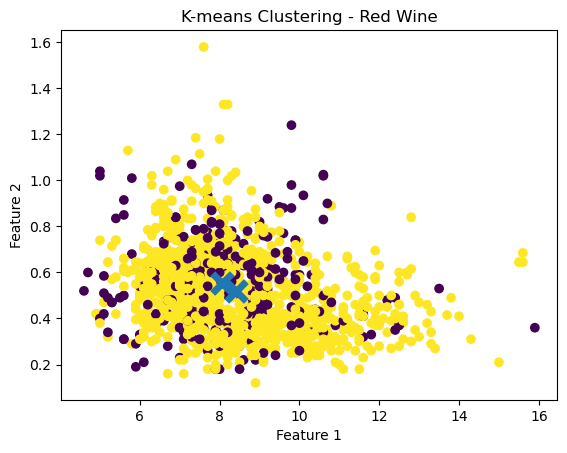

In [29]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="x", s=200, linewidths=5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering - Red Wine')
plt.show()